## linear model

In [25]:
import sklearn
import numpy as np

import shap

X, y = shap.datasets.california(n_points=1000)

X100 = shap.utils.sample(X, 100)  # 100 instances for use as the background distribution

model = sklearn.linear_model.LinearRegression()
model.fit(X, y)

LinearRegression()

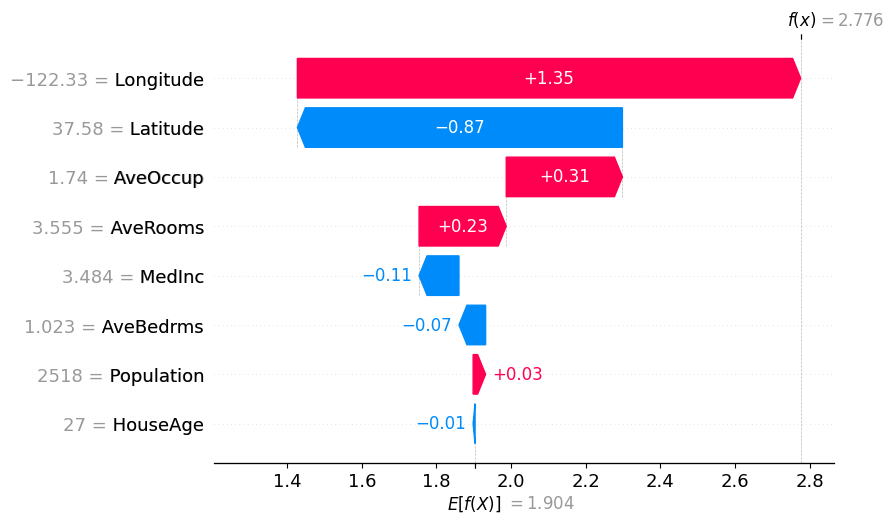

In [13]:
explainer = shap.Explainer(model.predict, X100) # use background distribution
shap_values = explainer(X) # explain for entire dataset
sample_ind = 200 # explain for 200th sample for dataset
shap.plots.waterfall(shap_values[sample_ind], max_display=14)

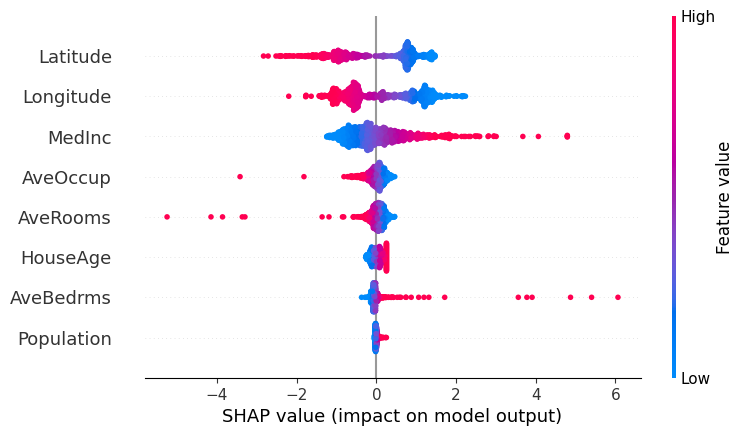

In [31]:
shap.plots.beeswarm(shap_values)

In [65]:
shap_values.values.shape

(1000, 8)

In [73]:
mean_shape_values = shap_values.mean(0).values
mean_shape_values.shape

(8,)

In [74]:
feature_importance_by_shapley = dict((zip(X.columns, mean_shape_values)))
feature_importance_by_shapley

{'MedInc': np.float64(0.026614098863867234),
 'HouseAge': np.float64(0.006397119464439217),
 'AveRooms': np.float64(0.014105582309666923),
 'AveBedrms': np.float64(-0.007316030330963566),
 'Population': np.float64(-0.002050857805663221),
 'AveOccup': np.float64(0.00015580194435250533),
 'Latitude': np.float64(0.026133543072201018),
 'Longitude': np.float64(0.0772504505166803)}

In [75]:
feature_importance = shap_values
for feature, value in zip(shap_values.feature_names, shap_values.values):
    print(feature, np.median(value), len(value))

MedInc -0.024020736454643078 8
HouseAge -0.014233665003249366 8
AveRooms 0.004354019901773934 8
AveBedrms 0.057717271352049945 8
Population 0.059560246243239856 8
AveOccup 0.05914988044283702 8
Latitude -0.08407546874439131 8
Longitude 0.03830697551326179 8


#### what scores mean?
- the absolute bigger value, the greater impact on predicted score
- positive: causes increase, negative: cause decrease

#### one product sales ~ one dataset
we want values for entire dataset because entire dataset is one sample on high level:
- `X` attributes describing regions
- `y` sales of certain product in given regions

if we want to evaluate a new product sales on same regions we need to create new dataset (same `X`, new `y`)
